# Trade network analysis
**Brian Dew (brianwdew@gmail.com)**

`07_individual_product.ipynb`

This notebook 

METODO:

1. 

#### Import packages

In [1]:
# uses panadas, networkx, powerlaw, and os packages
import pandas as pd
import networkx as nx
import powerlaw
import os
%matplotlib inline
from scipy import optimize

os.chdir('C:/Working/trade_network/data/')        # Change to working directory

In [23]:
pl_ = {}
prod = 390740
df = pd.read_csv('clean/baci07_2011_clean.csv', index_col='hs6').sort_index()
G = nx.from_pandas_dataframe(df.loc[prod], 'i', 'j', 'v', nx.DiGraph())  #build network
deg = G.out_degree(weight='v').values()         # calc weighted outdeg for each country
fit = powerlaw.Fit(deg)         # est. distrib. and save alpha value

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


In [24]:
print 'Alpha: ', fit.power_law.alpha
print 'Sigma: ', fit.power_law.sigma
print 'X-Min: ', fit.power_law.xmin

Alpha:  1.24344517652
Sigma:  0.0270494640576
X-Min:  42.6055


In [25]:
fit.distribution_compare('power_law', 'exponential')

(203.678506955432, 9.7358396575555992e-17)

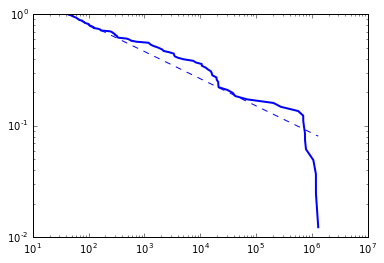

In [26]:
fig2 = fit.plot_ccdf(color='b', linewidth=2)
fit.power_law.plot_ccdf(color='b', linestyle='--', ax=fig2)